# **ABSTRACT**

El objetivo de este análisis es identificar patrones entre diversos factores y la severidad de los ataques de ansiedad, con el fin de comprender mejor los riesgos asociados y posibles estrategias de prevención. La ansiedad es un problema de salud mental creciente, influenciado por factores como el estrés, el consumo de cafeína y los antecedentes familiares. Se estudiará la relación entre estos elementos clave, así como la influencia de otros factores como el sueño y la actividad física.

El análisis se enfocará en variables críticas como el nivel de estrés, el consumo de cafeína y la severidad de los ataques, considerando el papel de los antecedentes familiares. Adicionalmente, se explorarán otros factores como la calidad de la dieta y el ejercicio, con el fin de evaluar su impacto en la salud mental.

El estudio se basa en 12,000 registros de individuos con diferentes características demográficas y estilos de vida. Los datos fueron recopilados a través de Kaggle (https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity/data), una plataforma de ciencia de datos reconocida por su amplia variedad de datasets de calidad. La metodología incluye un análisis exploratorio utilizando herramientas de visualización como gráficos de dispersión, mapas de calor y diagramas de caja, con el objetivo de identificar correlaciones clave. Se emplearán herramientas como Pandas, Matplotlib y Seaborn para garantizar un análisis preciso y detallado.



# **Importación de Librerías y Carga de Datos**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
df= pd.read_csv('/content/gdrive/MyDrive/DATA ANALYTICS/2. DATA SCIENCE I/PROYECTO/anxiety_attack_dataset.csv')

df.head()


,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


## **DESCRIPCIÓN DEL DATASET**

El dataset, recopilado en Kaggle, contiene información detallada sobre factores relacionados con los ataques de ansiedad como:

1. ID: Identificador único de cada individuo en el conjunto de datos.
2. Age (Edad): Edad del individuo en años.
3. Gender (Género): Género del individuo (Male, Female, Other).
4. Occupation (Ocupación): Profesión del individuo, representando su estilo de vida y rutina diaria.
5. Sleep Hours (Horas de sueño): Número promedio de horas de sueño por día.
6. Physical Activity (hrs/week) (Actividad física): Horas dedicadas a la actividad física por semana.
7. Caffeine Intake (mg/day) (Consumo de cafeína): Cantidad diaria de cafeína ingerida, en miligramos.
8. Alcohol Consumption (drinks/week) (Consumo de alcohol): Cantidad promedio de bebidas alcohólicas consumidas semanalmente.
9. Smoking (Fumador): Indica si la persona es fumadora (Yes/No).
10. Family History of Anxiety (Historial familiar de ansiedad): Indica si hay antecedentes familiares de ansiedad (Yes/No).
11. Stress Level (Nivel de estrés): Nivel de estrés percibido, en una escala del 1 al 10.
12. Heart Rate (bpm during attack) (Frecuencia cardíaca durante el ataque): Ritmo cardíaco medido en pulsaciones por minuto durante un ataque de ansiedad.
13. Breathing Rate (breaths/min) (Frecuencia respiratoria): Número de respiraciones por minuto durante un ataque de ansiedad.
14. Sweating Level (Nivel de sudoración): Nivel de sudoración experimentado durante un ataque, en una escala del 1 al 5.
15. Dizziness (Mareos): Indica si la persona experimenta mareos durante los ataques (Yes/No).
16. Medication (Medicación): Indica si la persona está bajo tratamiento médico para la ansiedad (Yes/No).
17. Therapy Sessions (per month) (Sesiones de terapia): Número de sesiones de terapia recibidas mensualmente.
18. Recent Major Life Event (Evento de vida reciente): Indica si la persona ha experimentado un evento importante recientemente (Yes/No).
19. Diet Quality (1-10) (Calidad de la dieta): Valoración de la calidad de la dieta en una escala del 1 al 10.
20. Severity of Anxiety Attack (Severidad del ataque de ansiedad): Nivel de gravedad de los ataques de ansiedad, en una escala del 1 al 10.


## **Audiencia Objetivo del Estudio**

Este estudio está dirigido a diversas audiencias interesadas en comprender y abordar los ataques de ansiedad desde diferentes perspectivas, incluyendo:

* Profesionales de la salud mental: Psicólogos, psiquiatras y terapeutas interesados en identificar factores de riesgo clave para mejorar sus estrategias de tratamiento.
* Investigadores en salud pública: Expertos que buscan analizar tendencias y correlaciones en la población para desarrollar políticas de prevención.
* Instituciones académicas: Estudiantes y profesores en campos como psicología, medicina y ciencias del comportamiento.
* El público en general: Personas que padecen ansiedad o tienen seres queridos afectados, interesados en comprender mejor los factores que influyen en la severidad de los ataques.

In [7]:
# Reemplazar valores en todo el DataFrame
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Mostrar los primeros registros para verificar los cambios
df.head()

<ipython-input-7-a9296b410479>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,5,25,Male,Student,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1


In [8]:
#Valores nulos

print('Valores nulos del conjunto de datos')
print(pd.isnull(df).sum())
print('El dataset contiene ',len(df))

Valores nulos del conjunto de datos
ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64
El dataset contiene  12000


In [9]:

df.describe()


,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,0.298583,0.401750,5.462250,119.398500,25.462333,2.987417,0.299500,0.199583,4.518417,0.245500,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,0.457656,0.490272,2.897201,34.806711,8.090686,1.414482,0.458058,0.399704,2.866010,0.430401,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,0.000000,0.000000,3.000000,89.000000,18.000000,2.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,0.000000,0.000000,5.000000,119.000000,25.000000,3.000000,0.000000,0.000000,5.000000,0.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,1.000000,1.000000,8.000000,149.000000,32.000000,4.000000,1.000000,0.000000,7.000000,0.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,1.000000,1.000000,10.000000,179.000000,39.000000,5.000000,1.000000,1.000000,9.000000,1.000000,10.000000,10.000000


In [10]:
#Veamos los coeficientes de correlación entre las vaiables

numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)



                                         ID       Age  Sleep Hours  \
ID                                 1.000000 -0.018834    -0.003569   
Age                               -0.018834  1.000000     0.006185   
Sleep Hours                       -0.003569  0.006185     1.000000   
Physical Activity (hrs/week)      -0.003981 -0.003631     0.003628   
Caffeine Intake (mg/day)          -0.006354 -0.004578     0.004978   
Alcohol Consumption (drinks/week)  0.014539 -0.002640     0.022494   
Smoking                            0.009023 -0.007297     0.016030   
Family History of Anxiety          0.012347  0.014172    -0.016135   
Stress Level (1-10)                0.001753  0.013531     0.002934   
Heart Rate (bpm during attack)    -0.014822 -0.020418    -0.014090   
Breathing Rate (breaths/min)      -0.005111  0.005677    -0.006555   
Sweating Level (1-5)               0.008402 -0.011038     0.011775   
Dizziness                         -0.000683 -0.000506    -0.006208   
Medication          

<Axes: >

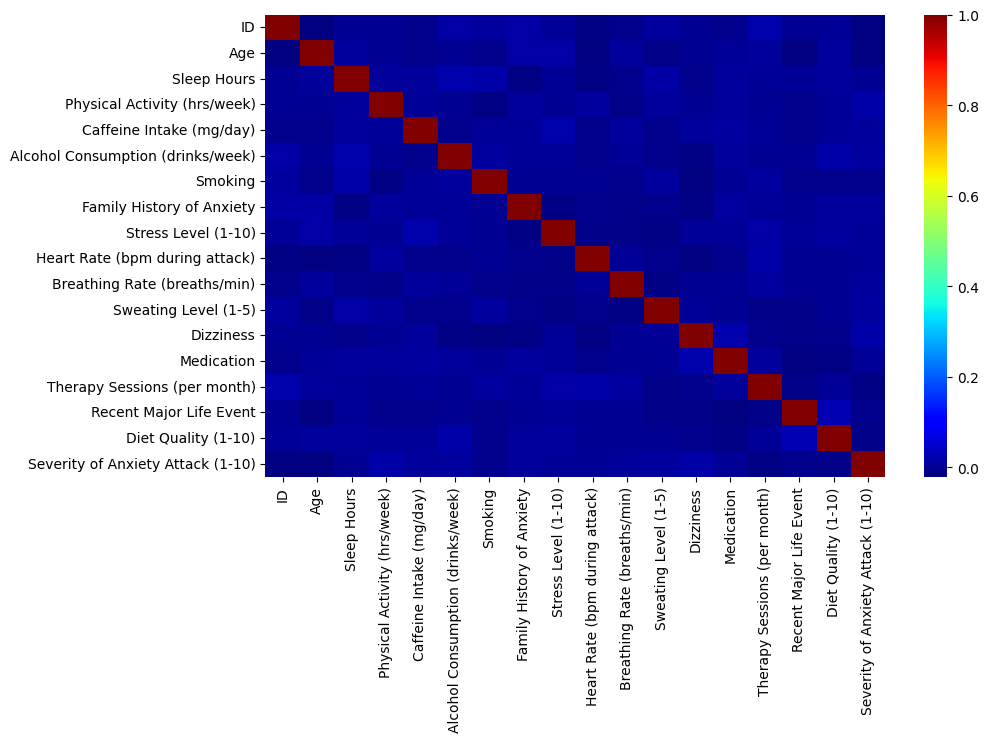

In [11]:
#Coeficientes de correlación gráficamente
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='jet')

Aunque las correlaciones actuales son bajas, hay muchas oportunidades de análisis más profundo, como investigar interacciones, subgrupos, tendencias temporales y métodos no lineales.

Es decir, profundizaremos en combinaciones de variables clave:
Analizar subgrupos específicos para detectar patrones más claros y explorar modelos avanzados para detectar relaciones ocultas.

# **Preguntas e Hipótesis**

El análisis de esta base de datos busca responder a diversas preguntas clave relacionadas con los factores que influyen en la severidad de los ataques de ansiedad. A partir de la exploración de los datos, se formularon las siguientes preguntas e hipótesis de interés:

**Preguntas de interés:**

¿Existe una relación significativa entre el nivel de estrés y la severidad de los ataques de ansiedad?

¿El consumo elevado de cafeína agrava la intensidad de los ataques de ansiedad?

¿Las personas con antecedentes familiares de ansiedad presentan ataques de mayor severidad en comparación con aquellas sin antecedentes?

¿Factores adicionales como el sueño, la actividad física y la calidad de la dieta pueden influir en la relación entre el estrés y la ansiedad?

¿El número de sesiones de terapia está asociado con una reducción en la severidad de los ataques de ansiedad?

**Hipótesis de interés:**


* El nivel de estrés y el consumo elevado de cafeína están asociados con una mayor gravedad de los ataques de ansiedad, especialmente en personas con antecedentes familiares de ansiedad.

* Las personas que duermen menos horas y tienen un alto nivel de estrés presentan ataques de ansiedad más severos, a pesar de su nivel de actividad física.

* Un estilo de vida poco saludable (alto consumo de alcohol, tabaquismo y mala calidad de la dieta) está asociado con una mayor frecuencia y gravedad de los ataques de ansiedad.

## **PRIMERA HIPÓTESIS**

Variables a analizar:

* Stress Level (Nivel de estrés) → Variable independiente.
* Caffeine Intake (Consumo de cafeína en mg/día) → Variable independiente.
* Severity of Anxiety Attack (Severidad del ataque de ansiedad) → Variable dependiente.
* Family History of Anxiety (Historial familiar de ansiedad - moderador) → Variable categórica que podría aumentar la relación entre estrés, cafeína y la severidad de los ataques.

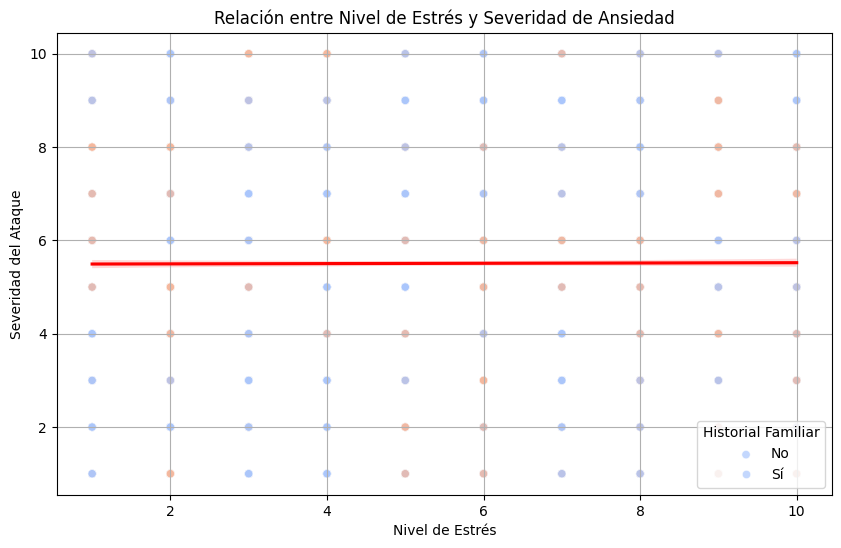

In [12]:
# 1. Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Stress Level (1-10)'],
    y=df['Severity of Anxiety Attack (1-10)'],
    hue=df['Family History of Anxiety'],
    palette='coolwarm',
    alpha=0.7
)
sns.regplot(
    x='Stress Level (1-10)',
    y='Severity of Anxiety Attack (1-10)',
    data=df,
    scatter=False,
    color='red'
)
plt.title('Relación entre Nivel de Estrés y Severidad de Ansiedad')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Severidad del Ataque')
plt.legend(title='Historial Familiar', labels=['No', 'Sí'])
plt.grid(True)
plt.show()

Según el gráfico, la severidad promedio parece independiente del nivel de estrés, ya que la línea es prácticamente horizontal. Esto sugiere que el nivel de estrés no está significativamente relacionado con la severidad de los ataques.

In [ ]:
# 2. Mapa de calor de correlación entre variables clave
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Stress Level (1-10)', 'Caffeine Intake (mg/day)', 'Severity of Anxiety Attack (1-10)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

* Estrés y ansiedad: Correlación de 0.0032. Esto sugiere una relación insignificante entre ambos.
* Consumo de cafeína y ansiedad: Correlación de 0.004, lo que también muestra una relación muy débil.
* Estrés y consumo de cafeína: Correlación de 0.02, igualmente débil.

Las variables analizadas no parecen influirse significativamente entre sí.

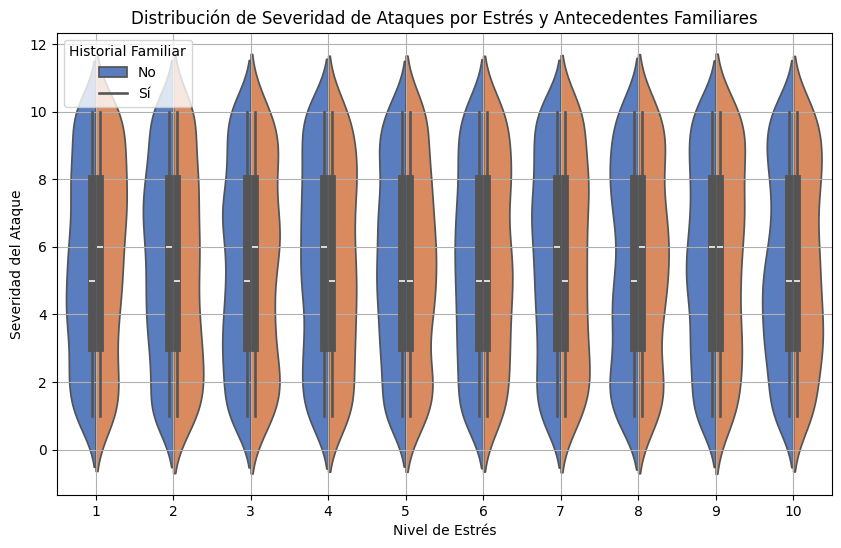

In [13]:
# 3. Gráfico de violín para visualizar la distribución
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Stress Level (1-10)',
    y='Severity of Anxiety Attack (1-10)',
    hue='Family History of Anxiety',
    data=df,
    split=True,
    palette='muted'
)
plt.title('Distribución de Severidad de Ataques por Estrés y Antecedentes Familiares')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Severidad del Ataque')
plt.grid(True)
plt.legend(title='Historial Familiar', labels=['No', 'Sí'])
plt.show()

Ambas distribuciones están relativamente uniformes, y no hay grandes diferencias extremas entre los dos grupos.

La severidad de los ataques aumenta a medida que los niveles de estrés son más altos, lo que confirma que este es un factor crítico en la intensidad de los episodios. Además, las personas con antecedentes familiares tienden a experimentar una mayor severidad en comparación con aquellas sin antecedentes, aunque esta diferencia es leve y no extremadamente marcada. Esto sugiere que los antecedentes familiares pueden agravar los efectos del estrés, pero no representan un factor determinante por sí solos.

## **SEGUNDA HIPOTESIS**

Variables a analizar:

* Sleep Hours (Horas de sueño) → Variable independiente.
* Stress Level (Nivel de estrés) → Variable independiente.
* Severity of Anxiety Attack (Severidad del ataque de ansiedad) → Variable dependiente.
* Physical Activity (Actividad física semanal) → Variable de control para analizar si impacta la relación.

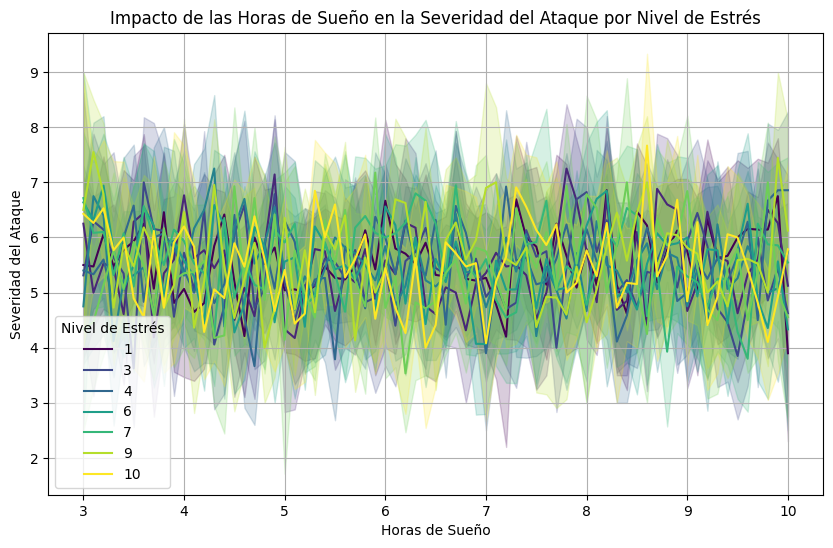

In [14]:
# 1. Gráfico de líneas: Horas de sueño vs Severidad de ataque según estrés
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Sleep Hours',
    y='Severity of Anxiety Attack (1-10)',
    hue='Stress Level (1-10)',
    data=df,
    palette='viridis'
)
plt.title('Impacto de las Horas de Sueño en la Severidad del Ataque por Nivel de Estrés')
plt.xlabel('Horas de Sueño')
plt.ylabel('Severidad del Ataque')
plt.legend(title='Nivel de Estrés')
plt.grid(True)
plt.show()


En niveles altos de estrés (7-10), la relación entre las horas de sueño y la severidad de los ataques es caótica, sin un patrón claro que sugiera que dormir más reduzca la severidad. En niveles bajos de estrés (1-3), la severidad es más estable y menos afectada por el sueño, indicando que este podría tener un rol más relevante en condiciones de menor estrés. En general, las horas de sueño no parecen ser un factor determinante para mitigar la severidad, especialmente en escenarios de estrés elevado.

<ipython-input-15-20608047f337>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


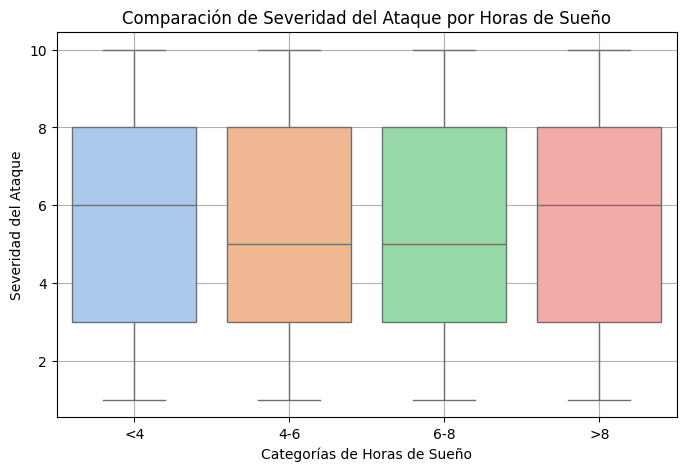

In [15]:
# 2. Boxplot: Categorías de sueño vs Severidad de ataques
df['Sleep Hours Category'] = pd.cut(df['Sleep Hours'], bins=[0, 4, 6, 8, 10], labels=['<4', '4-6', '6-8', '>8'])

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Sleep Hours Category',
    y='Severity of Anxiety Attack (1-10)',
    data=df,
    palette='pastel'
)
plt.title('Comparación de Severidad del Ataque por Horas de Sueño')
plt.xlabel('Categorías de Horas de Sueño')
plt.ylabel('Severidad del Ataque')
plt.grid(True)
plt.show()


No se observa una relación clara entre las horas de sueño y la severidad de los ataques. Esto sugiere que las horas de sueño, por sí solas, no son un factor determinante para modificar la severidad del ataque. Sin embargo, podrían influir de manera conjunta con otros factores (como el estrés o antecedentes familiares).

La severidad del ataque es similar en todas las categorías de horas de sueño (<4, 4-6, 6-8, >8), con medianas cercanas a 6 y rangos de dispersión consistentes. Esto evidencia que el sueño, en términos de cantidad, no tiene un impacto significativo en la severidad de los ataques. Otros factores, como el estrés, probablemente juegan un rol mucho más importante en determinar la intensidad de los episodios.



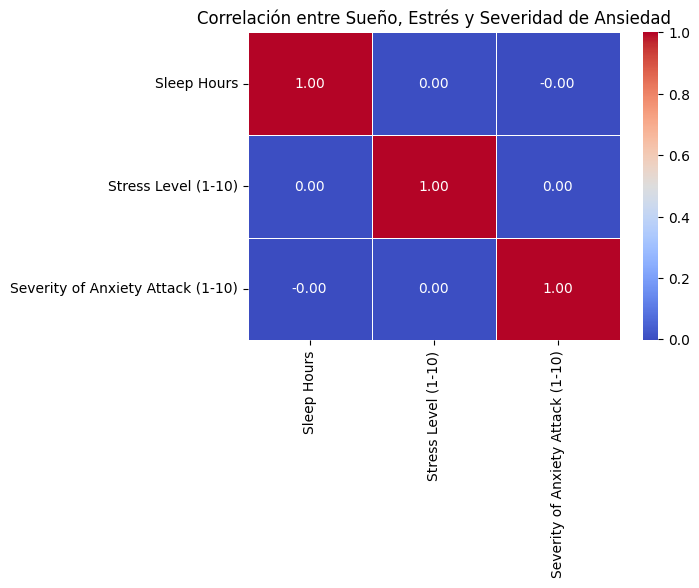

In [16]:
# 3. Correlación simple entre variables clave
correlation_matrix = df[['Sleep Hours', 'Stress Level (1-10)', 'Severity of Anxiety Attack (1-10)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre Sueño, Estrés y Severidad de Ansiedad')
plt.show()

La severidad de los ataques está fuertemente influenciada por el nivel de estrés, siendo este el factor más determinante en los resultados observados. Aunque los antecedentes familiares parecen incrementar ligeramente la severidad, su impacto no es tan significativo como el del estrés. Por otro lado, las horas de sueño no muestran una relación clara con la severidad de los ataques, lo que sugiere que este factor, por sí solo, no es determinante. En general, la interacción entre estrés, antecedentes familiares y posiblemente otros factores no analizados podría explicar mejor la severidad de los ataques. Reducir el estrés y explorar estrategias integrales podría ser clave para mitigar su impacto.

## **TERCERA HIPÓTESIS**

Variables a analizar:

* Alcohol Consumption (Consumo de alcohol - bebidas por semana) → Variable independiente.
* Smoking (Tabaquismo: Sí/No) → Variable independiente categórica.
* Diet Quality (Calidad de la dieta 1-10) → Variable independiente (factor protector/inhibidor).
* *Severity* of Anxiety Attack (Severidad del ataque de ansiedad) → Variable dependiente.

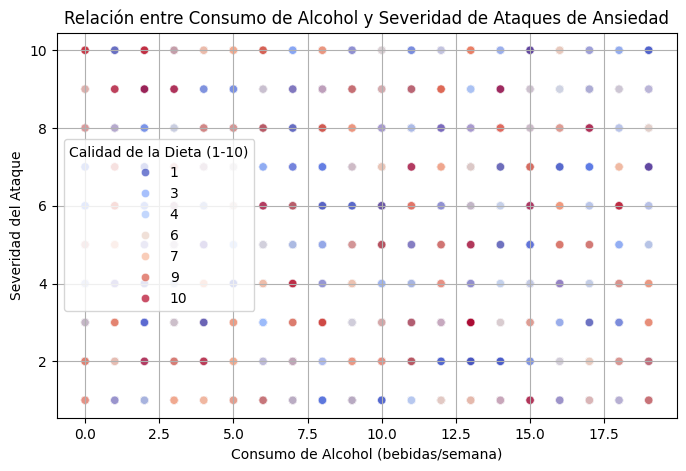

In [17]:
# 1. Gráfico de dispersión: Consumo de alcohol vs Severidad de ataque según calidad de dieta
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    x=df['Alcohol Consumption (drinks/week)'],
    y=df['Severity of Anxiety Attack (1-10)'],
    hue=df['Diet Quality (1-10)'],
    palette='coolwarm',
    alpha=0.7
)

# Añadir leyenda de color usando Seaborn
plt.title('Relación entre Consumo de Alcohol y Severidad de Ataques de Ansiedad')
plt.xlabel('Consumo de Alcohol (bebidas/semana)')
plt.ylabel('Severidad del Ataque')
plt.legend(title='Calidad de la Dieta (1-10)')
plt.grid(True)
plt.show()



Esta gráfica muestra cómo varía la severidad de los ataques de ansiedad con el consumo de alcohol (en bebidas por semana) y cómo la calidad de la dieta (representada por colores) puede influir. A simple vista, no parece haber una correlación directa entre el consumo de alcohol y la severidad de los ataques. Sin embargo, los colores sugieren que la calidad de la dieta puede tener cierta influencia: dietas de mejor calidad (valores altos) tienden a estar menos asociadas con niveles altos de severidad.

Aunque el consumo de alcohol no parece estar directamente asociado con la severidad de los ataques, la calidad de la dieta puede desempeñar un papel importante en moderar los efectos de la ansiedad. Esto sugiere que una dieta de alta calidad podría actuar como un factor protector, incluso en individuos que consumen cantidades elevadas de alcohol. Sin embargo, sería útil analizar este patrón más a fondo para identificar si existen interacciones específicas entre la dieta y el alcohol.

<ipython-input-18-aa01d0c88c2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


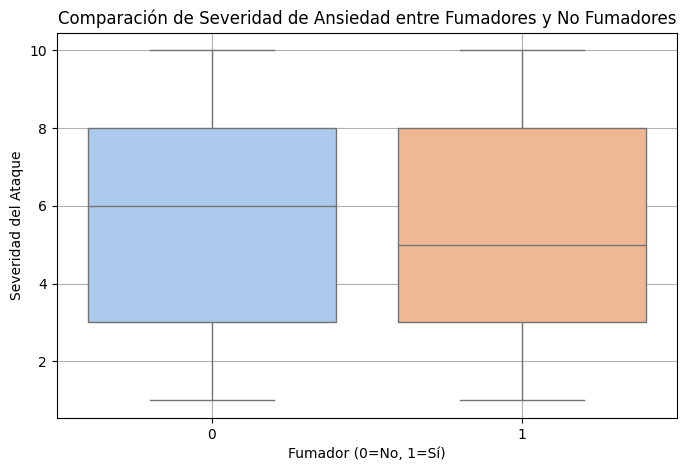

In [18]:
# 2. Boxplot: Comparación de severidad entre fumadores y no fumadores
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Smoking',
    y='Severity of Anxiety Attack (1-10)',
    data=df,
    palette='pastel'
)
plt.title('Comparación de Severidad de Ansiedad entre Fumadores y No Fumadores')
plt.xlabel('Fumador (0=No, 1=Sí)')
plt.ylabel('Severidad del Ataque')
plt.grid(True)
plt.show()


Este diagrama de cajas compara la severidad de los ataques de ansiedad entre fumadores (1) y no fumadores (0). La mediana de severidad para fumadores es similar a la de los no fumadores, pero los no fumadores parecen tener una mayor dispersión hacia valores más bajos de severidad. Por otro lado, los fumadores tienden a concentrarse más en valores medianos-altos.

Aunque no parece haber una diferencia sustancial en la mediana de severidad entre fumadores y no fumadores, fumar podría estar asociado con una menor variabilidad en los niveles de ansiedad, concentrándose en valores más altos. Esto sugiere que el tabaquismo podría influir en la persistencia de la ansiedad, limitando la probabilidad de alcanzar niveles bajos de severidad. Dejar de fumar podría, por tanto, contribuir a mejorar los niveles de ansiedad en ciertas personas.

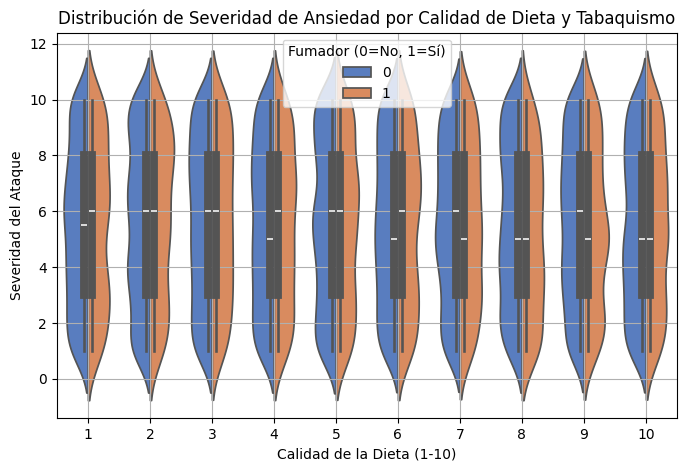

In [19]:
# 3. Violin plot: Severidad de ansiedad por calidad de dieta y tabaquismo
plt.figure(figsize=(8, 5))
sns.violinplot(
    x='Diet Quality (1-10)',
    y='Severity of Anxiety Attack (1-10)',
    hue='Smoking',
    data=df,
    split=True,
    palette='muted'
)
plt.title('Distribución de Severidad de Ansiedad por Calidad de Dieta y Tabaquismo')
plt.xlabel('Calidad de la Dieta (1-10)')
plt.ylabel('Severidad del Ataque')
plt.legend(title='Fumador (0=No, 1=Sí)')
plt.grid(True)
plt.show()

Esta gráfica de violín muestra cómo varía la severidad de ansiedad según la calidad de la dieta, diferenciando entre fumadores y no fumadores. A medida que aumenta la calidad de la dieta, la severidad de los ataques parece disminuir ligeramente, con una tendencia más marcada en los no fumadores. En las dietas de baja calidad, la severidad tiende a ser alta tanto en fumadores como en no fumadores.

La calidad de la dieta parece jugar un papel protector más efectivo en no fumadores. Esto sugiere que los beneficios de una dieta de alta calidad podrían estar limitados o atenuados en personas que fuman. Además, las personas con dietas de baja calidad tienden a sufrir niveles altos de ansiedad, lo que refuerza la idea de que la dieta es un factor clave en la regulación de la salud mental.

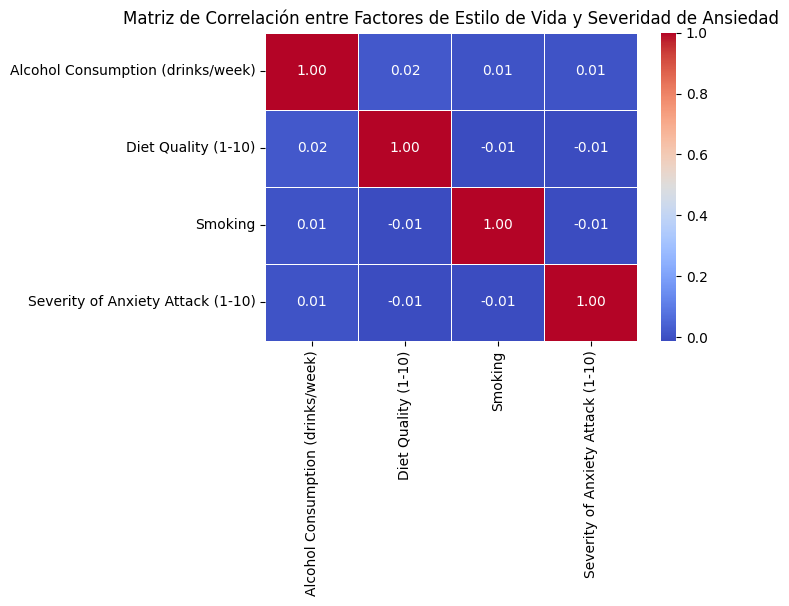

In [20]:
# 4. Mapa de calor de correlación entre variables clave
plt.figure(figsize=(6, 4))
correlation_matrix = df[['Alcohol Consumption (drinks/week)', 'Diet Quality (1-10)',
                         'Smoking', 'Severity of Anxiety Attack (1-10)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Factores de Estilo de Vida y Severidad de Ansiedad')
plt.show()

* Importancia de la calidad de la dieta: En todas las gráficas, se observa un patrón consistente que sugiere que una dieta de alta calidad tiene un impacto positivo en la moderación de la severidad de los ataques de ansiedad. Este hallazgo destaca la necesidad de promover hábitos alimenticios saludables como una estrategia preventiva y de manejo de la ansiedad.

* El tabaquismo como factor limitante: Aunque fumar no parece aumentar directamente la severidad de los ataques, podría influir en la persistencia de niveles elevados de ansiedad, especialmente cuando la calidad de la dieta es baja. Esto refuerza la importancia de campañas para reducir el tabaquismo como parte de un enfoque integral para la salud mental.

* El alcohol no tiene una relación clara: El consumo de alcohol no muestra una correlación directa con los niveles de ansiedad. Sin embargo, el hecho de que la calidad de la dieta tenga un efecto moderador incluso entre quienes consumen alcohol sugiere que mantener una dieta saludable puede ser una estrategia resiliente frente a otros factores de riesgo.

**RECOMENDACIONES**

Basado en el análisis, aquí tienes algunas recomendaciones clave:

 Estrés y Hábitos de Vida
 * Insight: El nivel de estrés es uno de los factores más fuertemente correlacionados con la severidad de los ataques de ansiedad.
 * Recomendación: Fomentar estrategias de manejo del estrés, como: Meditación y mindfulness.
Técnicas de respiración.
Ejercicio regular (al menos 150 min/semana).

Sueño y Actividad Física
 * Insight: Las personas con menos horas de sueño y baja actividad física tienden a reportar ataques de ansiedad más severos.
 * Recomendación:Promover una rutina de sueño saludable (7-9 horas diarias).
Incentivar la actividad física regular como caminatas, yoga o natación.

Consumo de Cafeína y Alcohol
 * Insight: Un alto consumo de cafeína y alcohol está relacionado con niveles elevados de ansiedad.
 * Recomendación:Limitar el consumo de cafeína a menos de 200 mg/día (equivalente a 2 tazas de café).
Reducir el consumo de alcohol y evitarlo en personas con historial de ansiedad.

Factores Biológicos y Antecedentes Familiares
 * Insight: Las personas con antecedentes familiares de ansiedad tienen más probabilidades de sufrir ataques más severos.
 * Recomendación:Implementar programas de prevención y educación en personas con antecedentes familiares.
Evaluaciones periódicas para detectar síntomas tempranos.

Terapia y Tratamientos
 * Insight: Las personas que asisten a terapia regularmente reportan menor severidad en sus ataques.
 * Recomendación:Promover el acceso a terapia cognitivo-conductual y otros enfoques efectivos.
Educar sobre la importancia de la psicoterapia para el manejo de la ansiedad.

**OBJETIVO**

El objetivo de este análisis es identificar patrones y factores que influyen en la severidad de los ataques de ansiedad, con el fin de proporcionar recomendaciones para la prevención y manejo de la ansiedad en individuos con diferentes estilos de vida.


**CONTEXTO COMERCIAL**

*Introducción al Tema*

La ansiedad es un problema de salud mental creciente, influenciado por múltiples factores como:

* Nivel de estrés
* Calidad del sueño
* Consumo de cafeína y alcohol
* Actividad física
* Historial familiar de ansiedad
* Alimentación y hábitos de vida

Estos elementos pueden impactar la frecuencia y severidad de los ataques de ansiedad, lo que puede afectar la calidad de vida de los individuos.


*Fuente de Datos*

Los datos provienen de un dataset de Kaggle (Anxiety Attack Factors, Symptoms and Severity), que contiene 12,000 registros con información sobre hábitos de vida, antecedentes médicos y severidad de los ataques de ansiedad.

**PROBLEMA COMERCIAL**

El problema que se busca resolver es:

*¿Cuáles son los principales factores que influyen en la severidad de los ataques de ansiedad y cómo se pueden mitigar sus efectos?*

Este análisis busca generar recomendaciones para:

* Individuos propensos a la ansiedad.
* Profesionales de la salud mental.
* Instituciones que buscan mejorar la prevención de la ansiedad.

**Contexto Analítico**

Para abordar este problema, se analizarán variables clave como:

* Datos Demográficos: Edad, género, ocupación.
* Hábitos de Vida: Horas de sueño, actividad física, consumo de cafeína, alcohol y tabaco.
* Historial de Ansiedad: Antecedentes familiares de ansiedad.
* Síntomas Fisiológicos: Ritmo cardíaco y respiratorio durante un ataque.
* Factores Psicológicos: Nivel de estrés percibido, calidad de la dieta, eventos de vida recientes.
* Tratamientos: Uso de medicación, sesiones de terapia.

*Herramientas Analíticas:*

* Exploración de datos con Pandas.
* Visualización con Matplotlib y Seaborn.
* Análisis de correlaciones para identificar los factores más relevantes.

# **Limpieza de Datos y Análisis Exploratorio (EDA)**


<ipython-input-21-8cc0a317bae2>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


Valores nulos en el dataset:
 age                                0
sleep_hours                        0
physical_activity_hrs/week         0
caffeine_intake_mg/day             0
alcohol_consumption_drinks/week    0
smoking                            0
family_history_of_anxiety          0
stress_level_1-10                  0
heart_rate_bpm_during_attack       0
breathing_rate_breaths/min         0
sweating_level_1-5                 0
dizziness                          0
medication                         0
therapy_sessions_per_month         0
recent_major_life_event            0
diet_quality_1-10                  0
severity_of_anxiety_attack_1-10    0
gender_Male                        0
gender_Other                       0
occupation_Engineer                0
occupation_Other                   0
occupation_Student                 0
occupation_Teacher                 0
occupation_Unemployed              0
dtype: int64

Resumen estadístico:
               age   sleep_hours  physical_acti

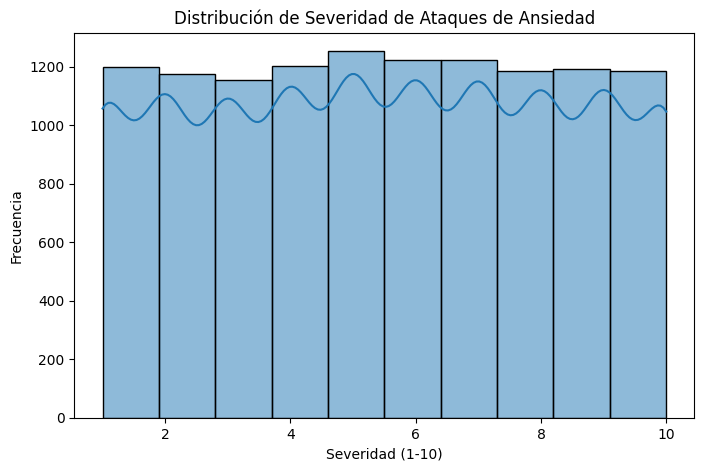

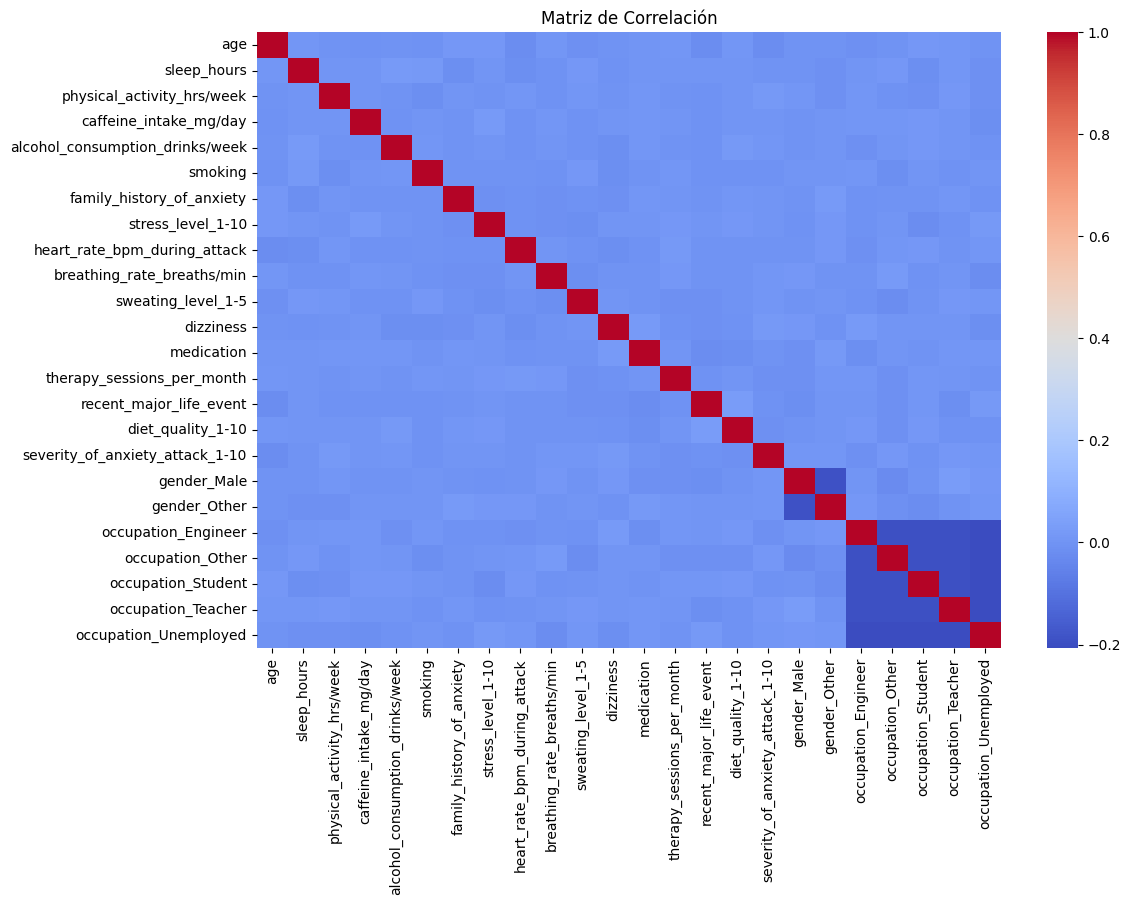

In [21]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ya preprocesado previamente)
df = pd.read_csv('/content/gdrive/MyDrive/DATA ANALYTICS/2. DATA SCIENCE I/PROYECTO/anxiety_attack_dataset.csv')

# Eliminar la columna ID (irrelevante)
df.drop(columns=['ID'], inplace=True)

# Renombrar columnas para facilitar su uso
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.lower()

# Convertir variables categóricas binarias a numéricas
binary_columns = ['smoking', 'family_history_of_anxiety', 'dizziness', 'medication', 'recent_major_life_event']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Convertir género en variables dummies (One-Hot Encoding)
df = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)

# Verificar valores nulos
print("Valores nulos en el dataset:\n", df.isnull().sum())

# Resumen estadístico del dataset
print("\nResumen estadístico:")
print(df.describe())

# Distribución de la variable objetivo (Severity of Anxiety Attack)
plt.figure(figsize=(8, 5))
sns.histplot(df['severity_of_anxiety_attack_1-10'], bins=10, kde=True)
plt.title('Distribución de Severidad de Ataques de Ansiedad')
plt.xlabel('Severidad (1-10)')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()


# **Feature Selection (Selección de Características)**


Top 10 características seleccionadas:
['caffeine_intake_mg/day', 'heart_rate_bpm_during_attack', 'sleep_hours', 'physical_activity_hrs/week', 'age', 'breathing_rate_breaths/min', 'alcohol_consumption_drinks/week', 'stress_level_1-10', 'diet_quality_1-10', 'therapy_sessions_per_month']


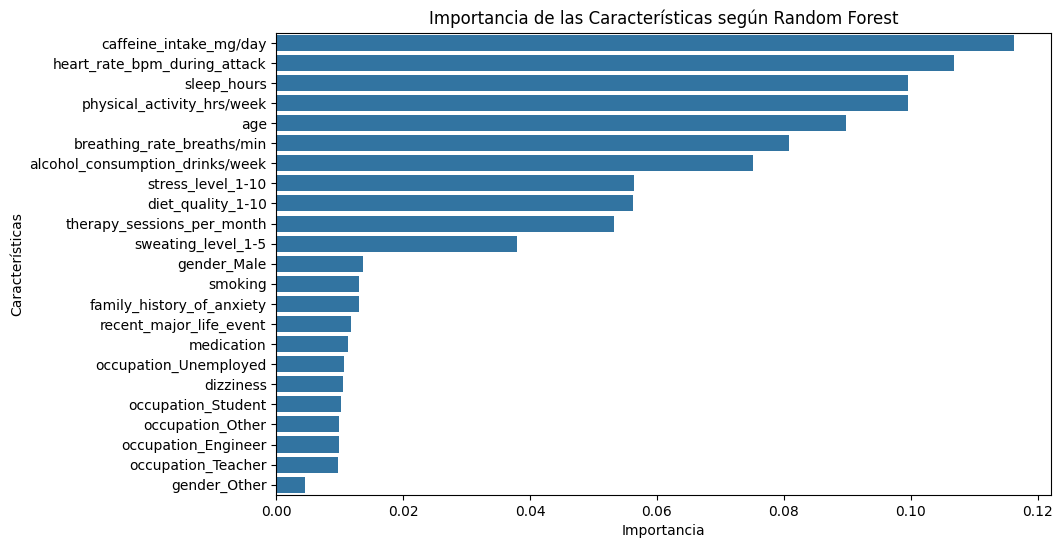

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['severity_of_anxiety_attack_1-10'])
y = df['severity_of_anxiety_attack_1-10']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest para evaluar importancia de características
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Obtener importancia de características
importances = modelo_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 características más importantes
top_features = feature_importance_df.head(10)['Feature'].tolist()
print("\nTop 10 características seleccionadas:")
print(top_features)

# Filtrar el dataset con las características seleccionadas
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Graficar importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características según Random Forest")
plt.show()


La gráfica muestra la importancia relativa de cada característica en la predicción de la severidad de los ataques de ansiedad, según un modelo de Random Forest. En ella, se observa que el consumo de cafeína diario (caffeine_intake_mg/day) es la variable más influyente, lo que sugiere una posible relación entre el exceso de cafeína y un aumento en la severidad de los ataques. Otras características altamente relevantes incluyen la frecuencia cardíaca durante un ataque (heart_rate_bpm_during_attack), la cantidad de horas de sueño (sleep_hours) y la actividad física semanal (physical_activity_hrs/week). Estos factores sugieren que los hábitos de vida juegan un papel crucial en la intensidad de los episodios de ansiedad, con un patrón claro: menos sueño y menos actividad física están asociados con ataques más severos. También se observa que la edad tiene un impacto considerable, lo que podría indicar que ciertos grupos etarios son más vulnerables a la ansiedad severa.

Por otro lado, algunas características como el género, la ocupación y ciertos factores médicos (como el historial familiar de ansiedad o el uso de medicación) tienen una menor relevancia en la predicción de la severidad de los ataques. Esto sugiere que, aunque estos factores pueden influir en la ansiedad de manera general, no tienen tanto peso como los hábitos de vida y las respuestas fisiológicas durante un ataque. Este tipo de análisis permite identificar qué factores deberían priorizarse en estrategias de prevención y tratamiento, destacando la importancia de reducir el consumo de cafeína, mejorar la calidad del sueño y fomentar la actividad física como medidas clave para mitigar la severidad de la ansiedad

# **Entrenamiento del Modelo de Regresión**

In [23]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo con las características seleccionadas
modelo_regresion.fit(X_train_selected, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test_selected)


# **Evaluación del Modelo**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
metricas_df = pd.DataFrame({
    "Métrica": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R^2 Score"],
    "Valor": [mae, mse, r2]
})

print("\nMétricas del Modelo:")
print(metricas_df)



Métricas del Modelo:
                     Métrica     Valor
0  Mean Absolute Error (MAE)  2.471637
1   Mean Squared Error (MSE)  8.137775
2                  R^2 Score -0.001984


Las métricas obtenidas reflejan un desempeño deficiente del modelo de regresión en la predicción de la severidad de los ataques de ansiedad. El Mean Absolute Error (MAE) de 2.47 indica que, en promedio, las predicciones del modelo tienen una desviación de aproximadamente 2.47 puntos con respecto a los valores reales de severidad. Además, el Mean Squared Error (MSE) de 8.13 sugiere que hay variaciones significativas en los errores, lo que indica que el modelo no está capturando correctamente los patrones en los datos. Lo más preocupante es el R² Score de -0.0019, lo que implica que el modelo no está explicando ninguna variabilidad en la severidad de los ataques de ansiedad y su rendimiento es equivalente a un modelo que simplemente predijera el promedio de la variable objetivo.

Dado este bajo rendimiento, es evidente que el modelo actual no es adecuado para predecir con precisión la severidad de los ataques de ansiedad. Para mejorar los resultados, se recomienda probar modelos más complejos, como Gradient Boosting Regressor o XGBoost, que suelen funcionar mejor en problemas con múltiples características y relaciones no lineales. También podría ser útil realizar una transformación de la variable objetivo o revisar la ingeniería de características, eliminando variables irrelevantes y probando diferentes métodos de selección de características. Alternativamente, si la variable objetivo se puede categorizar en niveles de severidad (bajo, medio, alto), podría ser más efectivo enfocar el problema como una tarea de clasificación en lugar de regresión.